In [1]:
!pip install qiskit matplotlib

Latex commands are defined in this cell
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# My solutions to exercises and problem sets from "Quantum Computation and Quantum Information"

## Exercises for Chapter 1

### Exercise 1.1 (page 36): (Probabilistic classical algorithm)

Given $n$ bits, the function $f(x)$ has a domain of size $2^n$. The best classical deterministic algorithm, in the worst case, must check half of all inputs + 1 (that is, $2^n/2 + 1= 2^{n-1}+1$).

Consider the probabilistic solution where we do $k$ unique evaluations of the $f(x)$ for unique and randomized $x \in \{0,1\}^n$. If any samples differ from the rest of the samples, we conclude $f(x)$ is balanced, otherwise we conclude it is constant.

If $f(x)$ is constant, we will be correct with probability 1. If $f(x)$ is balanced, for the case $k = 2$, there are only 4 possible sampling outcomes: $f(x_1) \otimes f(x_2) \in \{00, 01, 10, 11\}$. The probability of getting all equal outputs, that is $f(x_1) \otimes f(x_2) \in \{00, 11\}$ is $\frac{2^{n-1} - 1}{2^n - 1}$, so we will be incorrect with that probability. For n = 2 its 1/3. In the limit as n approaches infinity, this approaches 1/2

In general, given $n, k$, the prob of getting all equal outputs, that is $f(x_1) \otimes f(x_2) \otimes ... \otimes f(x_k) \in \{0^k, 1^k\}$ has probability $\prod_{i=1}^k \frac{2^{n-1} - k}{2^n - k}$, so we will be incorrect with that probability. For n = 2 its 1/3. In the limit as n approaches infinity, this approaches 1/2

So to answer the question posed by the exercise, the performance of the best classical algorithm for the Deutsch-Jozsa problem is $\mathcal{O}(1)$, since we can get better than $\epsilon < 1/2$ with $ k = 2 $ for any n

In [2]:
def epsilon(n, k):
    """
    Given the number of bits n and number of samples k, calculate the prob of the above
    algorithm being incorrect if f(x) is balanced
    """
    result = k
    for x in range(k):
        result *= (2**(n-1)-x)/(2**n - x)
    return result

epsilon(50, 2)

0.49999999999999956

### Exercise 1.2 (page 57): (Cloning and Distinguishability)

#### Cloning given Distinguishability

Given a circuit that can distinguish between non-orthogonal states: $$\ket{\Psi} = e^{i\gamma}(\cos\frac{\theta}{2}\ket{0} + e^{i\phi}\sin\frac{\theta}{2}\ket{1})$$

$$\ket{\Phi} = e^{i\gamma^{\prime}}(\cos\frac{\theta^{\prime}}{2}\ket{0} + e^{i\phi^{\prime}}\sin\frac{\theta^{\prime}}{2}\ket{1})$$

We can build a quantum cloning given below. Note we do this for 1 qubit, but the same procedure can be applied to an n-qubit register

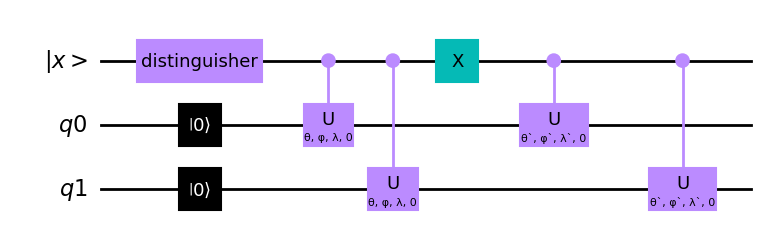

In [3]:
from qiskit import *
from qiskit.circuit import Parameter
from math import pi

# Psi
psi_theta = Parameter('θ')
psi_phi = Parameter('φ')
psi_lambda = Parameter('λ')

# Phi
phi_theta = Parameter('θ`')
phi_phi = Parameter('φ`')
phi_lambda = Parameter('λ`')

# Define our distinguisher oracle
distinguisher = QuantumCircuit(1, name="distinguisher")
distinguisher.to_instruction()

x_qubit = QuantumRegister(1, '|x>')
scratch0 = QuantumRegister(1)
scratch1 = QuantumRegister(1)

circuit = QuantumCircuit(x_qubit, scratch0, scratch1)
circuit.append(distinguisher,[0])
circuit.reset(1)
circuit.reset(2)
circuit.cu(psi_theta, psi_phi, psi_lambda, 0, 0, 1)
circuit.cu(psi_theta, psi_phi, psi_lambda, 0, 0, 2)
circuit.x(0)
circuit.cu(phi_theta, phi_phi, phi_lambda, 0, 0, 1)
circuit.cu(phi_theta, phi_phi, phi_lambda, 0, 0, 2)
circuit.draw(output='mpl')

Conversely, given a cloning circuit we may distinguish between two states with high probability by repeatedly cloning our state and measuring it in the $\ket{\Psi}$ basis a large amount of times. If we measure -1 even once, then we output 0, indicating the original state is $\ket{\Phi}$, otherwise we output 1, indicating  $\ket{\Psi}$. Note in the below circuit, the inverted U Gate is the adjoint of the above gate. This is just to effectively measure in the $\ket{0}$ basis

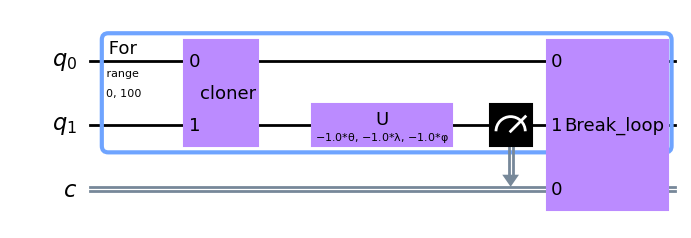

In [36]:
from qiskit.circuit.library import UGate

qc = QuantumCircuit(2, 1)

cloner = QuantumCircuit(2, name="cloner")
cloner.to_instruction()

N=100 # The larger the N, the higher the certainty in the result
with qc.for_loop(range(N)) as i:
    qc.append(cloner, [0,1])
    qc.append(UGate(psi_theta, psi_phi, psi_lambda).inverse(), [1]) # Bring from phi-basis to 0-basis
    qc.measure(1, 0)
    qc.break_loop().c_if(0, 0)
qc.draw(output='mpl')

## Exercises for Chapter 2

### Exercise 2.1 (page 63): (Linear dependence)

Show that the vectors below are linearly dependent

$$v_1 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, v_2 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, v_3 = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$$

Recall that N vectors $v_1, v_2, ... v_N$ are lineraly-dependent if there exists $a_1, a_2, ..., a_N$ such that $\sum_{i=1}^N{a_iv_i} = 0$, where at least one $a_i \ne 0$

Clearly this is the case for $a_1 = 1, a_2 = 1, a_3 = -1$


### Exercise 2.2 (page 64): (Matrix representation)
Given a linear operator $A$ which maps $\ket{0}$ to $\ket{1}$ and vice-versa, the matrix representation of $A$ in the basis $\ket{0}$ and $\ket{1}$ for both the input and output vector spaces is
$$A = \begin{bmatrix} 0 && 1\\ 1 && 0\end{bmatrix}$$

To find $A$ for different input and output basis, say $\ket{+}$ and $\ket{-}$, we can simply find the matrix $S$ which transforms from the ($\ket{0}$, $\ket{1}$) basis to the ($\ket{+}$, $\ket{-}$).

Trivially, this is $$ S = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 && 1\\ 1 && -1\end{bmatrix}$$

We may then construct the matrix $A^\prime = S^{\dagger}AS$

### Exercise 2.3 (page 64): (Matrix representation for operator products)
Show the matrix representation for linear transformation $BA$ is the matrix product of the matrix representation for $B$ and $A$, with respect to the approriate bases.

$$A: V \rightarrow W$$
$$B: W \rightarrow X$$

$V$, $W$, and $X$ have basis vectors $\ket{v_i}$, $\ket{w_j}$, and $\ket{x_k}$ respectively, such that

$$A\ket{v_i} = \sum_j{A_{ji}\ket{w_j}}$$
$$B\ket{w_j} = \sum_k{B_{kj}\ket{x_k}}$$

therefore $$ BA\ket{v_i} = B(A\ket{v_i}) = B(\sum_j{A_{ji}\ket{w_j}}) = \sum_j{A_{ji}B\ket{w_j}} = \sum_j{A_{ji}\sum_k{B_{kj}\ket{x_k}}} = \sum_k{\ket{x_k}\sum_j{B_{kj}A_{ji}}} = \sum_k{BA_{ki}\ket{x_k}}$$

where

$$ BA_{ki} = \sum_j{B_{kj}A_{ji}}$$

which is the matrix product of $B$ and $A$ by definition

### Exercise 2.4 (page 65): (Matrix representation for identity)
Show the identity operator $I: V \rightarrow V$ has a matrix representation of $\delta_{ij}$ when acting on the same input and output basis

The matrix representation of $I$ is one that satisfies:

$$I\ket{v_j} = \sum_i{I_{ij}\ket{v_i}} = I_{jj}\ket{v_j} + \sum_{i \ne j}{I_{ij}\ket{v_i}}$$

Because the vectors $\ket{v_i}$ are linearly-independent and so any combination of non-$\ket{v_j}$ vectors may not contribute to along the $\ket{v_j}$ direction, $I_{jj} = 1$. The remaining terms must be zero, which we prove by contradiction:

If $I_{ij} \ne 0$ for $i \ne j$, then 

$$\sum_{i \ne j}{I_{ij}\ket{v_i}} = 0$$

or equivalently, for $I_k \ne 0$, 

$$\sum_{k}{I_{k}\ket{v_k}} = 0$$

which implies $\ket{v_k}$ are linearly dependent. Therefore, $I_{ij} = \delta_{ij}$


### Exercise 2.5 (page 66): (Verify (.,.) is an inner product on $\bf{C^n}$)

The three requirements of an inner product $(a, b)$ are:
1. $(a, \alpha b + \beta c) = \alpha(a, b) + \beta (a, c)$ (that is, linear in its second argument)
2. $(a, b) = (b, a)^*$
3. $(a, a) \ge 0 $ with equality iff $a = 0$


Verify these are met for the inner product on $\bf{C^n}$ defined as:
$$ ((y_1,...,y_n),(z_1,...,z_n)) = \sum_i{y_i^*z_i} = \begin{bmatrix} y_1^* \ ... \ y_n^* \end{bmatrix} \begin{bmatrix} z_1 \\ \vdots \\ z_n \end{bmatrix} $$

1. $(a, \alpha b + \beta c) =  \sum_i{a_i^*(\alpha b_i + \beta c_i)} = \sum_i{a_i^*\alpha b_i + a_i^*\beta c_i} = \alpha \sum_i{a_i^*b_i} + \beta \sum_i{a_i^*c_i} = \alpha(a, b) + \beta (a, c)$

2. $(a, b) = \sum_i{a_i^*b_i} = (\sum_i{b_i^*a_i})^* = (b, a)^*$

3. $(a, a) = \sum_i{a_i^*a_i} = \sum_i{|a_i|^2}$ (finite sum of positive numbers is always positive)


### Exercise 2.6 (page 66): (Verify any (.,.) is conjugate-linear in first argument)

Prove $$ (\alpha a + \beta b, c) = \alpha^* (a, c) + \beta^* (b, c) $$

By point 2: $(\alpha a + \beta b, c) = (c, \alpha a + \beta b)^*$

By point 1: $(c, \alpha a + \beta b)^* =  (\alpha (c, a) + \beta (c, b))^* = \alpha^* (c, a)^* + \beta^* (c, b)^*$

By point 2: $\alpha^* (c, a)^* + \beta^* (c, b)^* = \alpha^* (a, c) + \beta^* (b, c)$

### Exercise 2.7 (page 66): (Verify orthogonality of $\ket{w} = (1,1)$ and $\ket{v} = (1, -1)$)

Also show the normalized versions.

$(\ket{w}, \ket{v}) = \begin{bmatrix} 1^* \ 1^* \end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = 0$


$$ \frac{\ket{w}}{||\ket{w}||} = \frac{\ket{w}}{\sqrt{\braket{w}{w}}} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} $$

$$ \frac{\ket{v}}{||\ket{v}||} = \frac{\ket{v}}{\sqrt{\braket{v}{v}}} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} $$


### Exercise 2.8 (page 66): (Prove Gram-Schmidt produces an orthonomral basis for V)

